In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

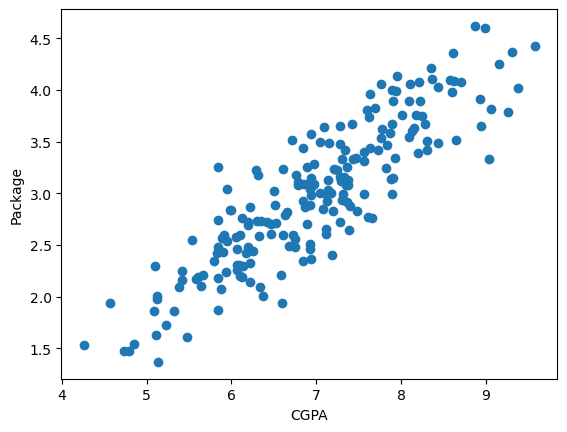

In [6]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [13]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [14]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [15]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

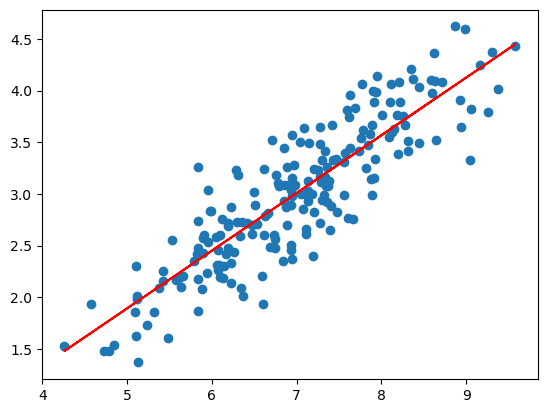

In [20]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
y_pred = lr.predict(X_test)

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [26]:
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [27]:
print('MSE', mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [30]:
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [32]:
print('R2-score', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2-score 0.780730147510384


In [33]:
X_test.shape

(40, 1)

In [34]:
#Adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [35]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa', 'random_feature', 'package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.484236,3.26
1,5.12,0.890477,1.98
2,7.82,0.200016,3.25
3,7.42,0.138644,3.67
4,6.94,0.731041,3.57


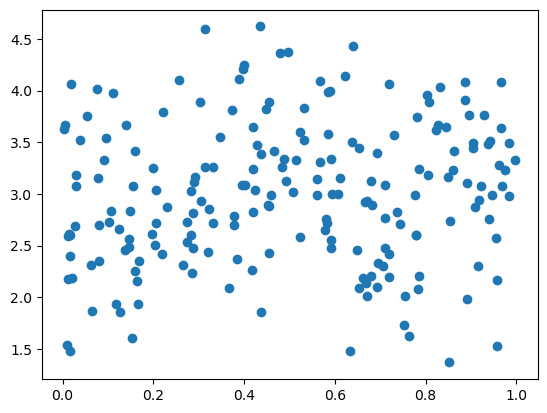

In [36]:
plt.scatter(new_df['random_feature'], new_df['package'])

In [37]:
x = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [43]:
print('R2-score', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2-score 0.7777416130254767


In [44]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7718927081050946